# User performance Analyser and fixing the their problems

1. analysing the data
2. preprocessing the data by removing the unnecessary columns
3. my major focus numerical data for analyse the user performance pattern/trends
4. plot various plot, through which user can analyse their performance throughout their quiz 
5. at last, we are suggest on which subject user should focus for better output

## 1.Receiving the json data from api

In [1]:
import requests
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

you can change your api_url link, for checking on other link. but remember json key should be same , otherwise you have to modify the key. 

In [2]:
api_url="https://api.jsonserve.com/XgAgFJ"
response = requests.get(api_url)
json_data = response.json()
#convert json_data into panda dataframe
df=pd.DataFrame(json_data)

In [3]:
df.head()

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,started_at,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:30:18.027+05:30,2025-01-17T15:30:18.044+05:30,2025-01-17T15:30:18.044+05:30,108,2,90 %,100,...,2025-01-17T15:18:30.000+05:30,2025-01-17T15:30:15.000+05:30,15:00,107,100,Topic Rank - #-171,9,12,"{'2523': 10109, '2529': 10130, '2533': 10149, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:17:44.042+05:30,2025-01-17T15:17:44.056+05:30,2025-01-17T15:17:44.056+05:30,92,1,100 %,100,...,2025-01-17T15:07:45.000+05:30,2025-01-17T15:17:41.000+05:30,15:00,395,23,Topic Rank - #-9140,3,3,"{'48': 192, '49': 197, '50': 199, '51': 203, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:13:19.682+05:30,2025-01-16T20:13:19.699+05:30,2025-01-16T20:13:19.699+05:30,116,2,96 %,100,...,2025-01-16T20:01:10.000+05:30,2025-01-16T20:13:18.000+05:30,15:00,115,100,Topic Rank - #-418,11,12,"{'2523': 10109, '2525': 10117, '2528': 10127, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:00:11.562+05:30,2025-01-16T20:00:11.573+05:30,2025-01-16T20:00:11.573+05:30,36,2,90 %,100,...,2025-01-16T19:52:57.000+05:30,2025-01-16T20:00:09.000+05:30,15:00,152,23,Topic Rank - #-1598,1,2,"{'49': 197, '52': 208, '53': 212, '54': 217, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T20:34:39.462+05:30,2025-01-15T20:34:39.478+05:30,2025-01-15T20:34:39.478+05:30,36,3,31 %,96,...,2025-01-15T20:21:25.000+05:30,2025-01-15T20:34:38.000+05:30,15:00,35,100,Topic Rank - #2023,0,20,"{'2521': 10099, '2523': 10107, '2532': 10145, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."


## 2.Preprocessing Data

In [4]:
df.columns

Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'response_map', 'quiz'],
      dtype='object')

In [6]:
columns_to_drop = ['submitted_at', 'created_at', 'updated_at', 'started_at', 'ended_at', 'response_map',]
df_cleaned = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [7]:
df_cleaned.head()

,id,quiz_id,user_id,score,trophy_level,accuracy,speed,final_score,negative_score,correct_answers,incorrect_answers,source,type,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,quiz
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,108,2,90 %,100,105.0,3.0,27,3,exam,topic,15:00,107,100,Topic Rank - #-171,9,12,"{'id': 51, 'name': None, 'title': 'Human Physi..."
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,92,1,100 %,100,92.0,0.0,23,0,exam,topic,15:00,395,23,Topic Rank - #-9140,3,3,"{'id': 6, 'name': None, 'title': 'Human Physio..."
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,116,2,96 %,100,115.0,1.0,29,1,live,topic,15:00,115,100,Topic Rank - #-418,11,12,"{'id': 51, 'name': None, 'title': 'Human Physi..."
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,36,2,90 %,100,35.0,1.0,9,1,live,topic,15:00,152,23,Topic Rank - #-1598,1,2,"{'id': 6, 'name': None, 'title': 'Human Physio..."
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,36,3,31 %,96,16.0,20.0,9,20,exam,topic,15:00,35,100,Topic Rank - #2023,0,20,"{'id': 51, 'name': None, 'title': 'Human Physi..."


#### Normalizing Quiz column for better understanding

In [8]:
quiz_normalized = pd.json_normalize(df['quiz'])
quiz_normalized.head()

,id,name,title,description,difficulty_level,topic,time,is_published,created_at,updated_at,...,exam_id,show_unanswered,ends_at,lives,live_count,coin_count,questions_count,daily_date,max_mistake_count,reading_materials
0,51,None,Human Physiology (15),,None,Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,True,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,...,None,False,2025-01-18,None,Free Test,-1,100,"January 17, 2025",15,[]
1,6,None,Human Physiology PYQ,,None,Body Fluids and Circulation,2024-04-25T00:00:00.000+05:30,True,2024-04-26T15:26:29.886+05:30,2024-06-05T18:27:32.163+05:30,...,None,False,2025-01-18,None,Free Test,-1,23,"January 17, 2025",15,[]
2,51,None,Human Physiology (15),,None,Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,True,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,...,None,False,2025-01-18,None,Free Test,-1,100,"January 17, 2025",15,[]
3,6,None,Human Physiology PYQ,,None,Body Fluids and Circulation,2024-04-25T00:00:00.000+05:30,True,2024-04-26T15:26:29.886+05:30,2024-06-05T18:27:32.163+05:30,...,None,False,2025-01-18,None,Free Test,-1,23,"January 17, 2025",15,[]
4,51,None,Human Physiology (15),,None,Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,True,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,...,None,False,2025-01-18,None,Free Test,-1,100,"January 17, 2025",15,[]


## 3.Graph to Analyse Trends

In [9]:
quiz_titles = df_cleaned['quiz'].apply(lambda x: x['title']).tolist()
scores = df_cleaned['score'].tolist()
accuracies = df_cleaned['accuracy'].str.rstrip('%').astype(float).tolist()
durations = df_cleaned['duration'].tolist()
incorrect_answers = df_cleaned['incorrect_answers'].tolist()
correct_answers = df_cleaned['correct_answers'].tolist()
initial_mistake_count = df_cleaned['initial_mistake_count'].tolist()
mistakes_corrected = df_cleaned['mistakes_corrected'].tolist()
final_scores = df_cleaned['final_score'].tolist()

# Extract and clean rank values
def extract_rank(rank_text):
    if pd.isna(rank_text):  
        return None  
    match = re.search(r'#-(\d+)', rank_text)  
    if match:
        return match.group(1)
    match = re.search(r'#(\d+)', rank_text)  
    if match:
        return match.group(1)
    return None  

ranks = df['rank_text'].apply(extract_rank).tolist()

# Print extracted data
print("Quiz Titles:", quiz_titles)
print("Scores:", scores)
print("Accuracies:", accuracies)
print("Durations:", durations)
print("Ranks:", ranks)


Quiz Titles: ['Human Physiology (15)', 'Human Physiology PYQ', 'Human Physiology (15)', 'Human Physiology PYQ', 'Human Physiology (15)', 'Reproduction', 'Human Physiology PYQ', 'PRINCIPLES OF INHERITANCE AND VARIATION PYQ', 'MICROBES IN HUMAN WELFARE  PYQ', 'REPRODUCTIVE HEALTH PYQ', 'HUMAN HEALTH AND DISEASE PYQ', 'REPRODUCTIVE HEALTH PYQ', 'Reproduction', 'Human Physiology (14)']
Scores: [108, 92, 116, 36, 36, 40, 36, 12, 76, 40, 112, 64, 52, 24]
Accuracies: [90.0, 100.0, 96.0, 90.0, 31.0, 38.0, 50.0, 30.0, 100.0, 100.0, 93.0, 84.0, 43.0, 66.0]
Durations: ['15:00', '15:00', '15:00', '15:00', '15:00', '15:00', '15:00', '15:00', '15:00', '15:00', '15:00', '15:00', '15:00', '15:00']
Ranks: ['171', '9140', '418', '1598', '2023', '1810', '1598', '2556', '8479', '2380', '5215', '5764', '301', '2392']


### 3.1 Score vs Accuracy plot

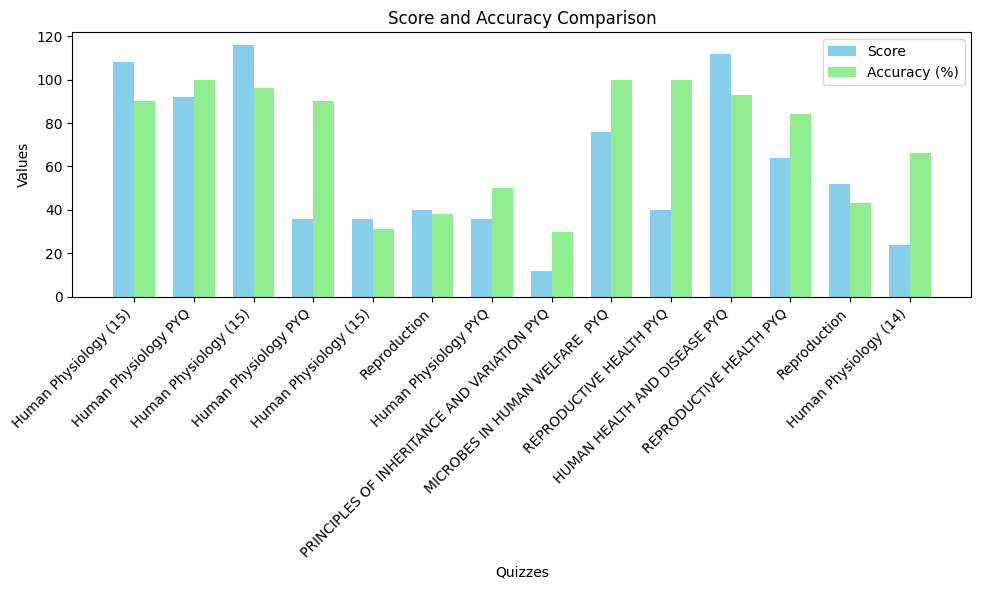

In [10]:
bar_width = 0.35
index = np.arange(len(quiz_titles))
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, scores, bar_width, label='Score', color='skyblue')
bar2 = ax.bar(index + bar_width, accuracies, bar_width, label='Accuracy (%)', color='lightgreen')

ax.set_title('Score and Accuracy Comparison')
ax.set_xlabel('Quizzes')
ax.set_ylabel('Values')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(quiz_titles, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


### 3.2 Correct vs Incorrect Trend

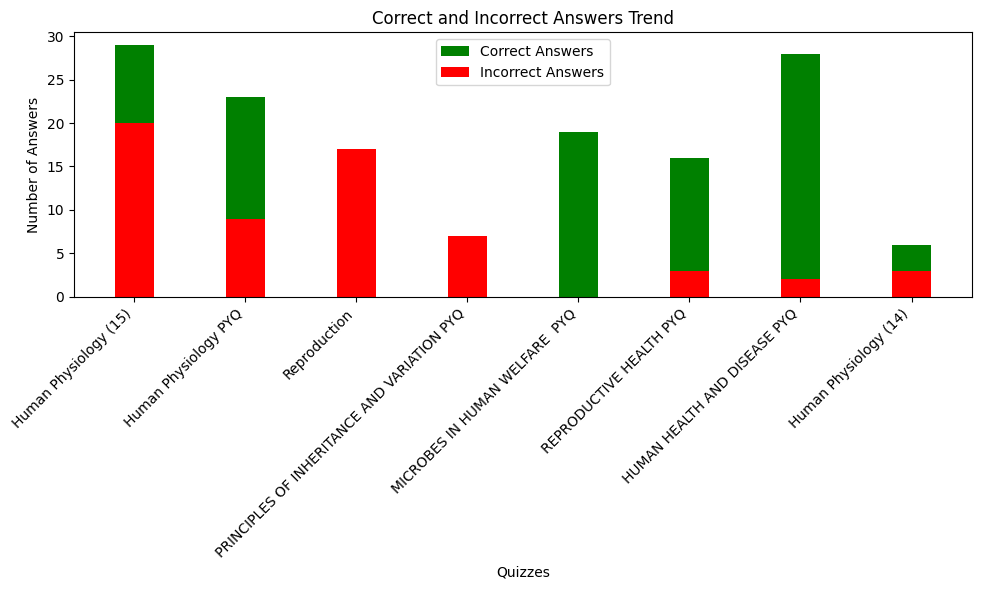

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
ax.bar(quiz_titles, correct_answers, bar_width ,label='Correct Answers',  color='green')
ax.bar(quiz_titles, incorrect_answers,bar_width ,label='Incorrect Answers', color='red')

ax.set_title('Correct and Incorrect Answers Trend')
ax.set_xlabel('Quizzes')
ax.set_ylabel('Number of Answers')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 3.3 Incorrect Mistake vs Mistake corrected

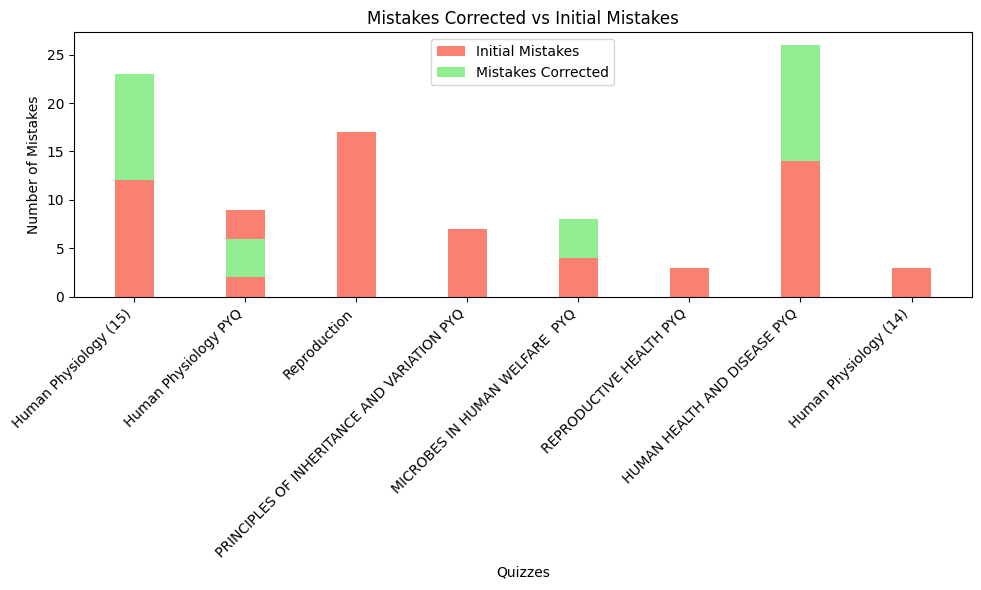

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(quiz_titles, initial_mistake_count,bar_width, label='Initial Mistakes', color='salmon')
ax.bar(quiz_titles, mistakes_corrected,bar_width, label='Mistakes Corrected', bottom=initial_mistake_count, color='lightgreen')

ax.set_title('Mistakes Corrected vs Initial Mistakes')
ax.set_xlabel('Quizzes')
ax.set_ylabel('Number of Mistakes')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 3.4 Rank in different Subjects

different color on same column because 2,3 time same quiz is there for proper visulalization.

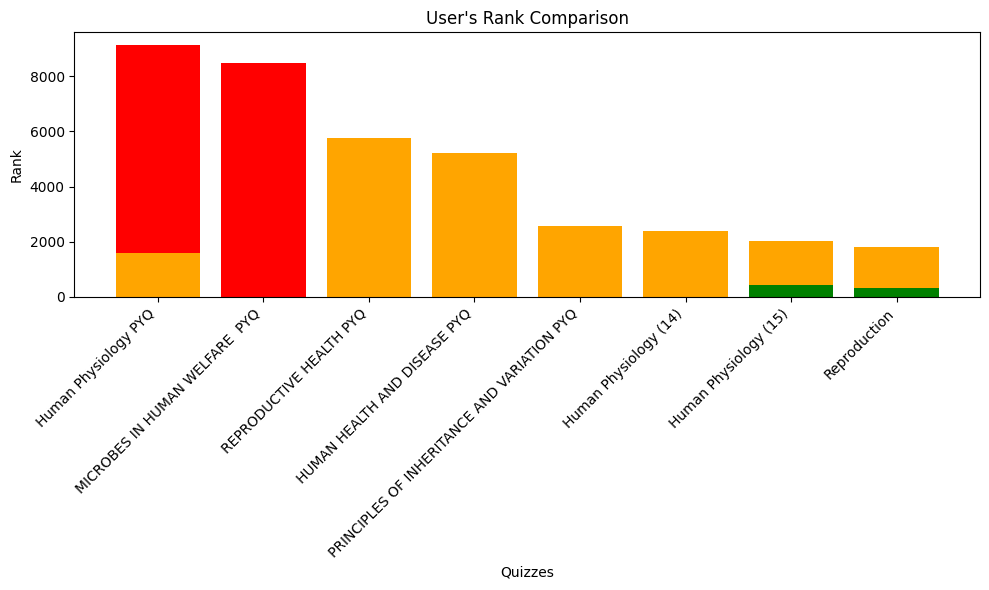

In [ ]:
ranks_int = list(map(int, ranks))
sorted_data = sorted(zip(ranks_int, quiz_titles), key=lambda x: x[0],reverse=True)
sorted_ranks, sorted_quiz_titles = zip(*sorted_data)

dynamic_color = [
    'green' if rank < 1000 else 'red' if rank > 8000 else 'orange'
    for rank in sorted_ranks
]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(sorted_quiz_titles, sorted_ranks, label='Rank', color=dynamic_color)
ax.set_title("User's Rank Comparison")
ax.set_xlabel('Quizzes')
ax.set_ylabel('Rank')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 4. Reccomendation

In [26]:

def clean_percentage(value):
    try:
        return float(value.replace('%', '').strip()) / 100
    except AttributeError:
        return value

df['accuracy'] = df['accuracy'].apply(clean_percentage)
df['correct_answers'] = df['correct_answers'].apply(pd.to_numeric, errors='coerce')
df['incorrect_answers'] = df['incorrect_answers'].apply(pd.to_numeric, errors='coerce')
df['final_score'] = df['final_score'].apply(pd.to_numeric, errors='coerce')
df['negative_score'] = df['negative_score'].apply(pd.to_numeric, errors='coerce')
aggregated_df = df[['score', 'accuracy', 'correct_answers', 'incorrect_answers', 'final_score', 'negative_score']].agg(['mean', 'std'])

def classify_based_on_agg(row, mean_score, std_score):
    score_mean = mean_score
    score_std = std_score
    if score_mean < 50 or score_std > 15:
        return 0  # Weak
    elif 50 <= score_mean < 80 or (score_std > 10 and score_std <= 15):
        return 1  # Moderate
    else:
        return 2  # Strong
mean_score = aggregated_df['score']['mean']
std_score = aggregated_df['score']['std']
df['strength'] = df.apply(lambda row: classify_based_on_agg(row, mean_score, std_score), axis=1)

# Grouping by quiz_id and getting counts of weak, moderate, and strong topics for each quiz
classification_df = df[['quiz_id', 'score', 'strength']].groupby(['quiz_id']).agg(
    weak=('strength', lambda x: (x == 0).sum()),
    moderate=('strength', lambda x: (x == 1).sum()),
    strong=('strength', lambda x: (x == 2).sum())
).reset_index()

print("Aggregated DataFrame (Mean and Std for each parameter):")
print(aggregated_df)

print("\nClassification DataFrame (Weak, Moderate, Strong Topics for each quiz):")
print(classification_df)


Aggregated DataFrame (Mean and Std for each parameter):
          score  accuracy  correct_answers  incorrect_answers  final_score  \
mean  60.285714  0.722143        15.071429           5.857143    54.428571   
std   34.675260  0.279042         8.668815           6.948792    38.142878   

      negative_score  
mean        5.857143  
std         6.948792  

Classification DataFrame (Weak, Moderate, Strong Topics for each quiz):
   quiz_id  weak  moderate  strong
0        6     3         0       0
1       18     2         0       0
2       20     1         0       0
3       24     1         0       0
4       25     1         0       0
5       50     1         0       0
6       51     3         0       0
7       57     1         0       0
8       58     1         0       0


### 4.2 New DataFrame for easily comparison

In [34]:
df['rank_text'] = df['rank_text'].apply(extract_rank)
df['title'] = df['quiz'].apply(lambda x: x.get('title', None))
final_df = df[['quiz_id', 'title','better_than','rank_text','initial_mistake_count' ,'accuracy', 'correct_answers', 'incorrect_answers', 'final_score', 'negative_score', 'strength']]
final_df.head()


,quiz_id,title,better_than,rank_text,initial_mistake_count,accuracy,correct_answers,incorrect_answers,final_score,negative_score,strength
0,51,Human Physiology (15),107,171,12,0.90,27,3,105.0,3.0,0
1,6,Human Physiology PYQ,395,9140,3,1.00,23,0,92.0,0.0,0
2,51,Human Physiology (15),115,418,12,0.96,29,1,115.0,1.0,0
3,6,Human Physiology PYQ,152,1598,2,0.90,9,1,35.0,1.0,0
4,51,Human Physiology (15),35,2023,20,0.31,9,20,16.0,20.0,0


### 4.3 Suggestion for rank improvement

In [35]:
def focus_recommendation(row):
    recommendations = []

    # 1. Focus based on quiz performance
    if row['final_score'] < 50:
        recommendations.append("Focus on improving foundational knowledge.")
    elif row['final_score'] >= 50 and row['final_score'] < 80:
        recommendations.append("Good progress, but focus on fine-tuning specific areas.")
    else:
        recommendations.append("Excellent performance, keep it up!")

    # 2. Focus based on accuracy
    if row['accuracy'] < 0.8:
        recommendations.append("Work on improving accuracy by reviewing missed questions.")
    
    # 3. Focus based on mistakes
    if row['initial_mistake_count'] > 10:
        recommendations.append("Minimize initial mistakes by reviewing key topics.")

    # 4. Focus based on incorrect answers
    if row['incorrect_answers'] > 5:
        recommendations.append("Review the topics related to your incorrect answers.")

    # 5. Focus based on negative score
    if row['negative_score'] > 5:
        recommendations.append("Reduce penalties by double-checking answers before submitting.")

    return " | ".join(recommendations)

# Apply the focus_recommendation function to each row
df['focus_area'] = df.apply(focus_recommendation, axis=1)

# Displaying the DataFrame with the focus recommendations
print(df[['quiz_id', 'title', 'focus_area']])


    quiz_id                                        title  \
0        51                        Human Physiology (15)   
1         6                         Human Physiology PYQ   
2        51                        Human Physiology (15)   
3         6                         Human Physiology PYQ   
4        51                        Human Physiology (15)   
5        57                                 Reproduction   
6         6                         Human Physiology PYQ   
7        20  PRINCIPLES OF INHERITANCE AND VARIATION PYQ   
8        24               MICROBES IN HUMAN WELFARE  PYQ   
9        18                      REPRODUCTIVE HEALTH PYQ   
10       25                 HUMAN HEALTH AND DISEASE PYQ   
11       18                      REPRODUCTIVE HEALTH PYQ   
12       58                                 Reproduction   
13       50                        Human Physiology (14)   

                                           focus_area  
0   Excellent performance, keep it up! | Mi

### 4.4 visualization

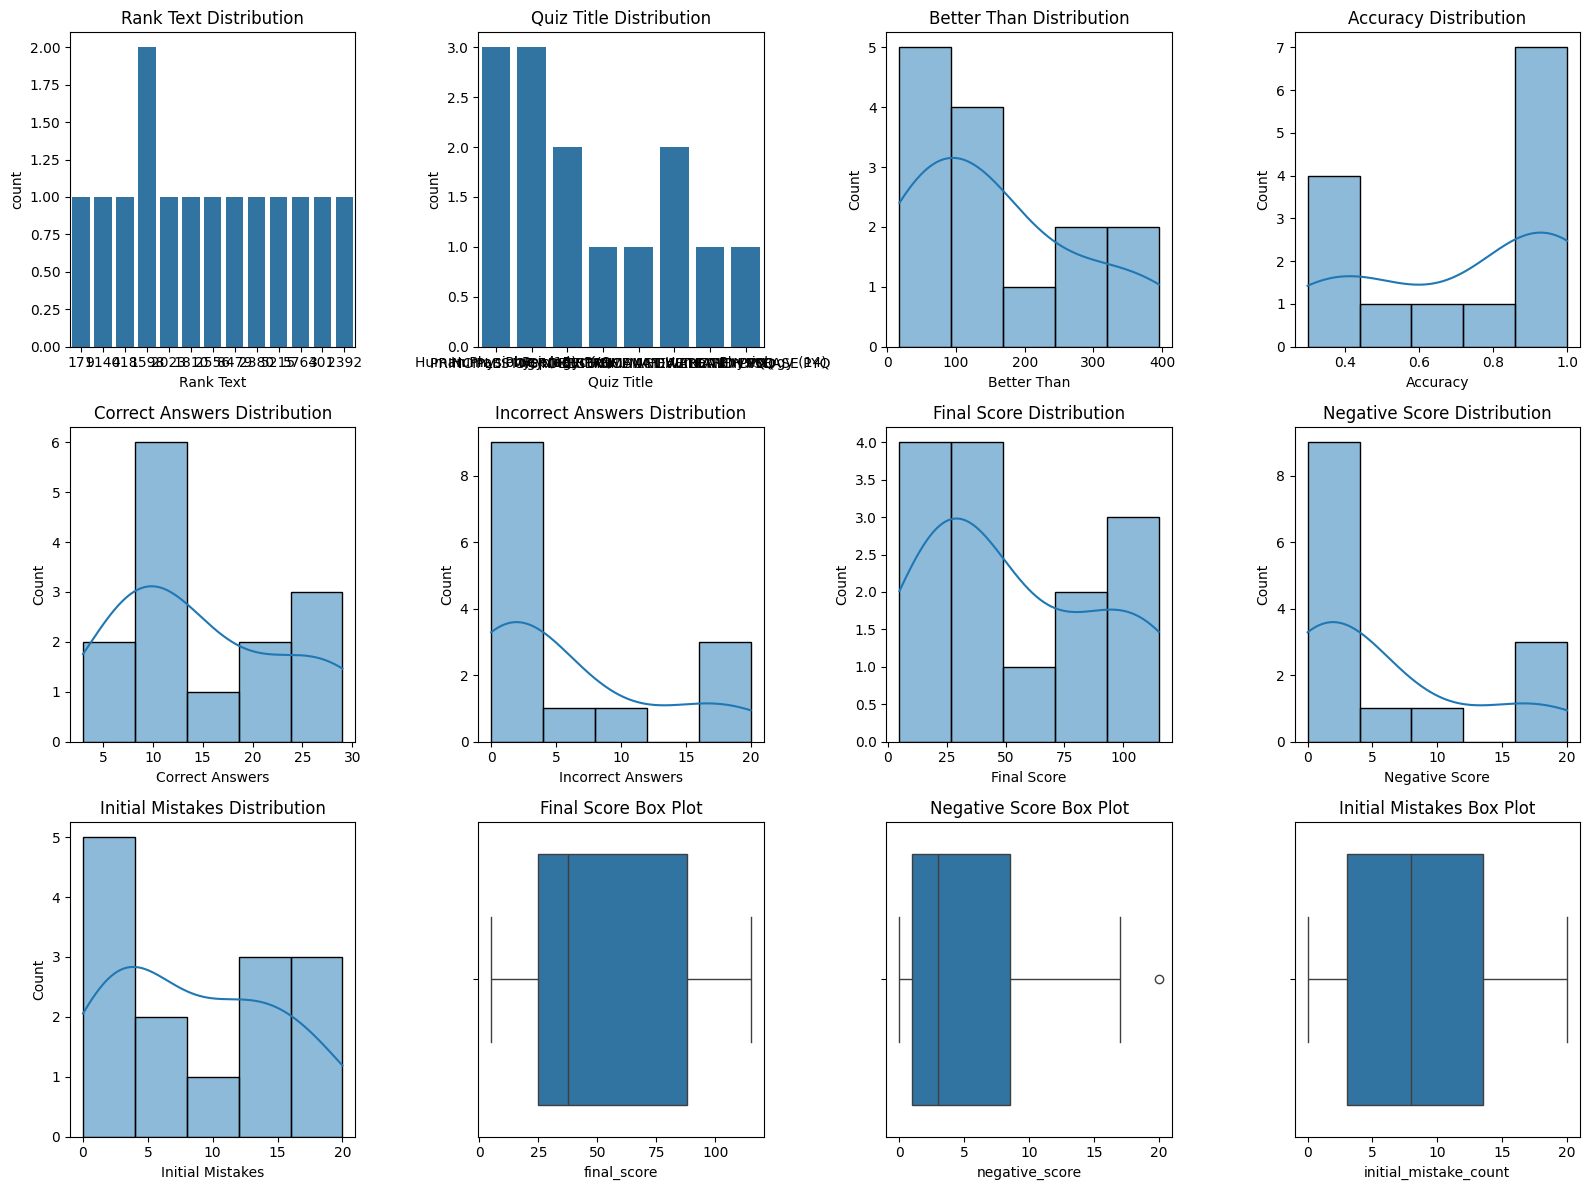

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for multiple subplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

# 1. Plot Bar Graph for Categorical Columns (rank_text, title)
sns.countplot(x='rank_text', data=final_df, ax=axes[0])
axes[0].set_title('Rank Text Distribution')
axes[0].set_xlabel('Rank Text')

sns.countplot(x='title', data=final_df, ax=axes[1])
axes[1].set_title('Quiz Title Distribution')
axes[1].set_xlabel('Quiz Title')

# 2. Plot Histograms for Numerical Columns
sns.histplot(final_df['better_than'], kde=True, ax=axes[2])
axes[2].set_title('Better Than Distribution')
axes[2].set_xlabel('Better Than')

sns.histplot(final_df['accuracy'], kde=True, ax=axes[3])
axes[3].set_title('Accuracy Distribution')
axes[3].set_xlabel('Accuracy')

sns.histplot(final_df['correct_answers'], kde=True, ax=axes[4])
axes[4].set_title('Correct Answers Distribution')
axes[4].set_xlabel('Correct Answers')

sns.histplot(final_df['incorrect_answers'], kde=True, ax=axes[5])
axes[5].set_title('Incorrect Answers Distribution')
axes[5].set_xlabel('Incorrect Answers')

sns.histplot(final_df['final_score'], kde=True, ax=axes[6])
axes[6].set_title('Final Score Distribution')
axes[6].set_xlabel('Final Score')

sns.histplot(final_df['negative_score'], kde=True, ax=axes[7])
axes[7].set_title('Negative Score Distribution')
axes[7].set_xlabel('Negative Score')

sns.histplot(final_df['initial_mistake_count'], kde=True, ax=axes[8])
axes[8].set_title('Initial Mistakes Distribution')
axes[8].set_xlabel('Initial Mistakes')

# 3. Box Plots for Distribution and Outliers (numerical columns)
sns.boxplot(x=final_df['final_score'], ax=axes[9])
axes[9].set_title('Final Score Box Plot')

sns.boxplot(x=final_df['negative_score'], ax=axes[10])
axes[10].set_title('Negative Score Box Plot')

sns.boxplot(x=final_df['initial_mistake_count'], ax=axes[11])
axes[11].set_title('Initial Mistakes Box Plot')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()
